Portfolio metrics for first 10 PCs on 2004-03-01 00:00:00:


,Annualized Return,Volatility,Sharpe Ratio,Sortino Ratio,Beta,Alpha,Treynor Ratio,Max Drawdown,Information Ratio,Calmar Ratio
PC1,0.276531,0.076849,3.598355,5.766790,0.551547,0.099884,0.501374,-0.030091,-0.668206,9.189941
PC2,-0.238620,0.097667,-2.443206,-3.967302,-0.372465,-0.119329,0.640651,-0.267949,-2.907072,-0.890544
PC3,-0.034970,0.062100,-0.563125,-0.754709,0.074098,-0.058702,-0.471944,-0.098976,-2.705336,-0.353318
PC4,0.110989,0.084885,1.307522,1.796645,-0.080716,0.136840,-1.375057,-0.063834,-1.311682,1.738695
PC5,-0.003675,0.069672,-0.052748,-0.080126,0.093942,-0.033762,-0.039120,-0.089426,-2.440681,-0.041096
...,...,...,...,...,...,...,...,...,...,...
PC248,0.005883,0.005104,1.152721,2.156638,0.009743,0.002762,0.603795,-0.004067,-2.530534,1.446600
PC249,-0.007489,0.005000,-1.497674,-2.496841,0.001258,-0.007892,-5.952082,-0.009141,-2.615753,-0.819329
PC250,0.000048,0.004594,0.010472,0.014814,-0.001712,0.000597,-0.028094,-0.008448,-2.548351,0.005695
PC251,0.032164,0.004743,6.781218,13.924086,0.006030,0.030232,5.334123,-0.001067,-2.310548,30.142074


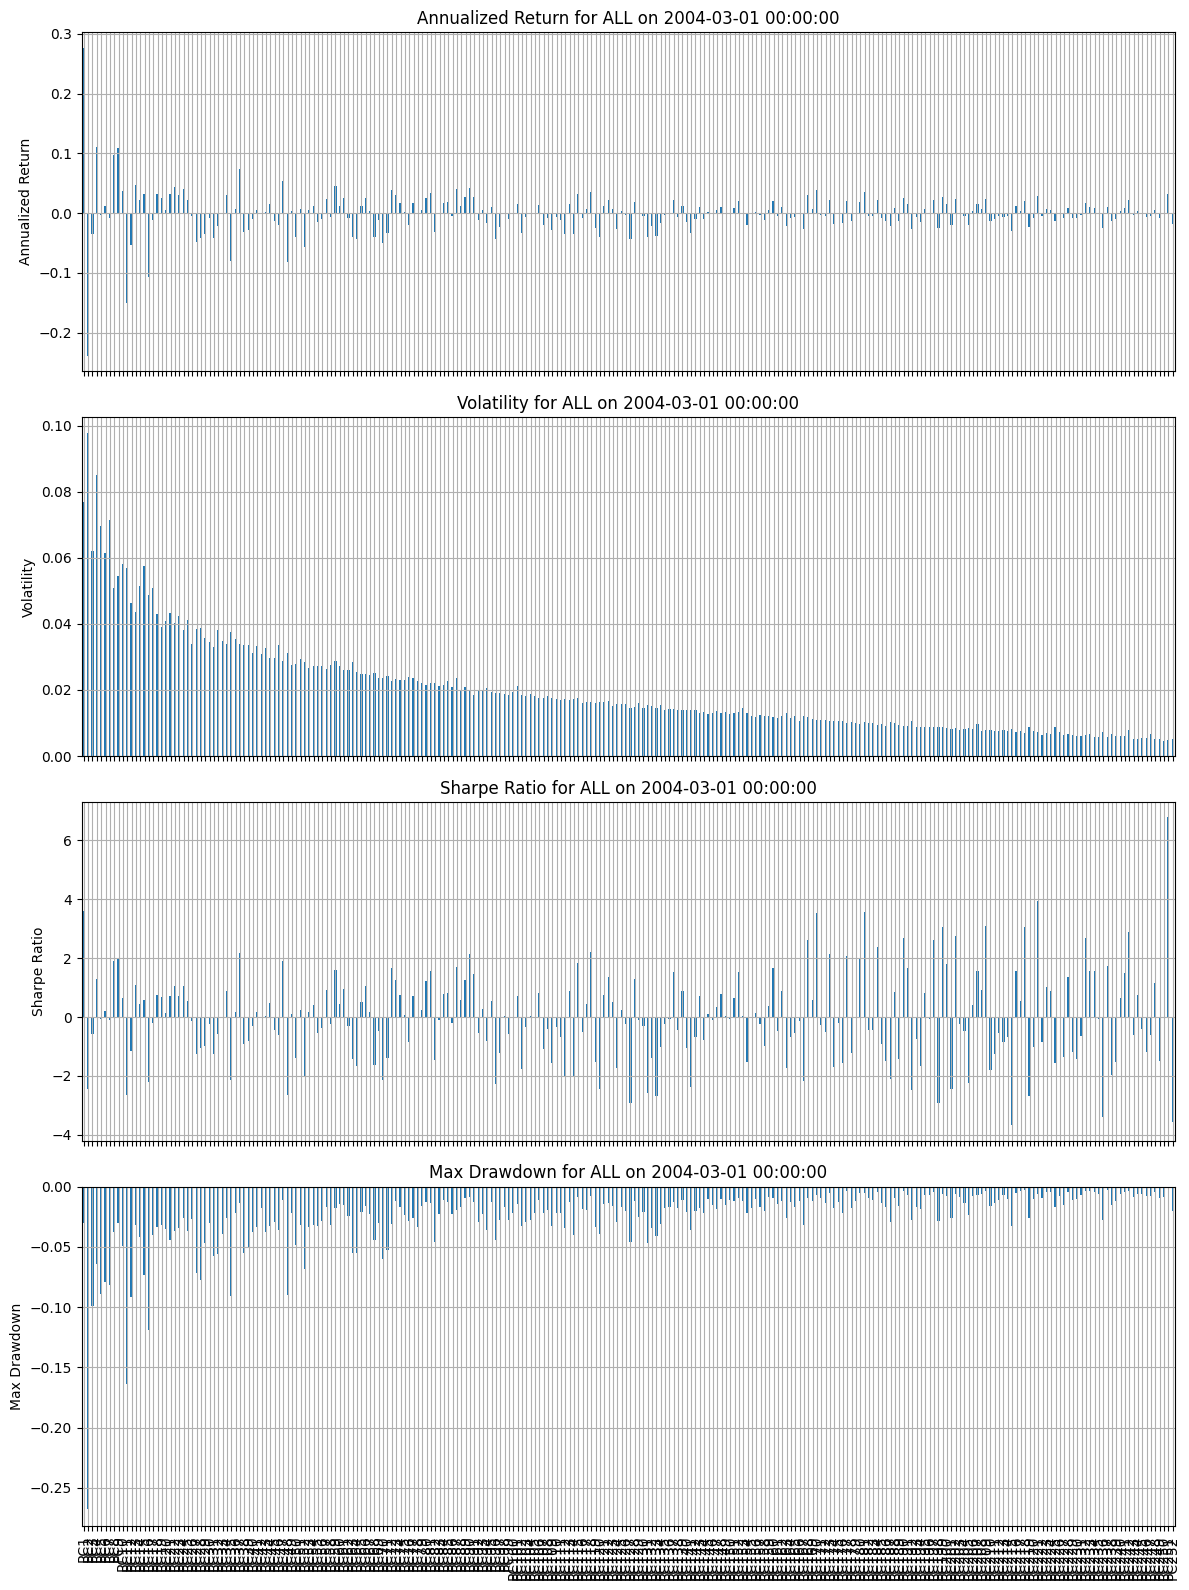

In [3]:
import pickle
import os
import matplotlib.pyplot as plt
from config import PORTFOLIO_METRICS_DIR
# Define path to the portfolio metrics pickle file
metrics_path = os.path.join(PORTFOLIO_METRICS_DIR, "portfolio_metrics_annual_1yr.pkl")

# Load the portfolio metrics dictionary
with open(metrics_path, "rb") as f:
    all_metrics = pickle.load(f)

# Extract the first rebalance date (sorted)
first_date = sorted(all_metrics.keys())[0]

# Get metrics DataFrame for that date
metrics_df = all_metrics[first_date]

# Select first 10 PCs/portfolios
metrics_10 = metrics_df.head(10)

# Display the metrics table
print(f"Portfolio metrics for first 10 PCs on {first_date}:")
display(metrics_df)

# --- Visualization: bar plots of key metrics per portfolio ---

# Select metrics to visualize (change or add more if you want)
metrics_to_plot = [
    "Annualized Return", "Volatility", "Sharpe Ratio", "Max Drawdown"
]

# Setup subplots: one plot per metric
fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(12, 4*len(metrics_to_plot)), sharex=True)

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    metrics_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(f"{metric} for ALL on {first_date}")
    ax.set_ylabel(metric)
    ax.grid(True)

plt.tight_layout()
plt.show()
